# HW Unsupervised Supervised Learning 

### Agi Rahmawandi <br> Batch 57

## Airline Customer Value Analysis Case

### Dataset ini berisi data customer sebuah perusahaan penerbangan dan beberapa fitur yang dapat menggambarkan value dari customer tersebut


https://www.kaggle.com/code/mustiadizaki/airline-customer-value-analysis-case

In [119]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns   


In [60]:
df = pd.read_csv('dataset/flight.csv')

In [61]:
df.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight
0,54993,11/2/2006,12/24/2008,Male,6,.,beijing,CN,31.0,3/31/2014,...,234188.0,580717,3/31/2014,1,3.483254,18,34,0.961639,619760,50
1,28065,2/19/2007,8/3/2007,Male,6,NaN,beijing,CN,42.0,3/31/2014,...,167434.0,293678,3/25/2014,7,5.194245,17,29,1.252314,415768,33
2,55106,2/1/2007,8/30/2007,Male,6,.,beijing,CN,40.0,3/31/2014,...,164982.0,283712,3/21/2014,11,5.298507,18,20,1.254676,406361,26
3,21189,8/22/2008,8/23/2008,Male,5,Los Angeles,CA,US,64.0,3/31/2014,...,125500.0,281336,12/26/2013,97,27.863636,73,11,1.090870,372204,12
4,39546,4/10/2009,4/15/2009,Male,6,guiyang,guizhou,CN,48.0,3/31/2014,...,130702.0,309928,3/27/2014,5,4.788079,47,27,0.970658,338813,39


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [63]:
df[['FIRST_FLIGHT_DATE','FFP_DATE']].max()

FIRST_FLIGHT_DATE    9/9/2013
FFP_DATE             9/9/2012
dtype: object

In [64]:
df_1 = df.copy()
df_1["FIRST_FLIGHT_DATE"] = pd.to_datetime(df_1["FIRST_FLIGHT_DATE"], errors="coerce")
df_1["LAST_FLIGHT_DATE"] = pd.to_datetime(df_1["LAST_FLIGHT_DATE"], errors="coerce")
df_1["LOAD_TIME"] = pd.to_datetime(df_1["LOAD_TIME"], errors="coerce")

In [65]:
df_1["total_revenue"] = df_1[["SUM_YR_1", "SUM_YR_2"]].sum(axis=1, skipna=True)

df_1["recency"] = (df_1["LOAD_TIME"] - df_1["LAST_FLIGHT_DATE"]).dt.days 

### 1 .Berapa banyak customer yang melakukan penerbangan dalam setahun terkahir

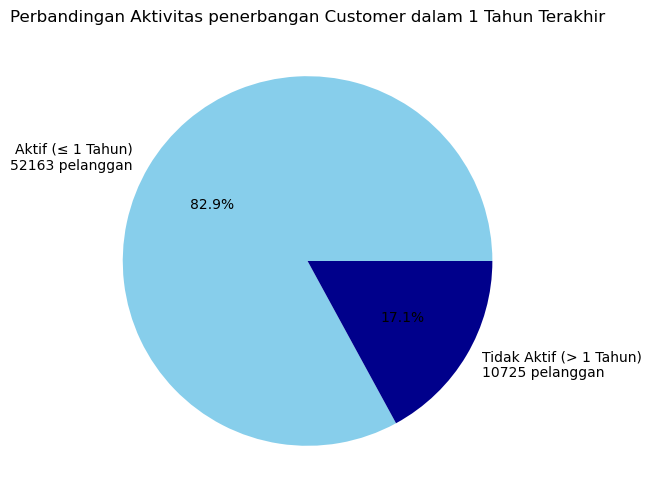

np.int64(52163)

In [66]:
# Hitung jumlah customer per kategori
aktif_count = (df_1['LAST_TO_END'] <= 365).sum()
tidak_aktif_count = ((df_1["LOAD_TIME"] - df_1["LAST_FLIGHT_DATE"]).dt.days > 365).sum()

# Data untuk pie chart
counts = [aktif_count, tidak_aktif_count]
labels = [
    f"Aktif (≤ 1 Tahun)\n{aktif_count} pelanggan",
    f"Tidak Aktif (> 1 Tahun)\n{tidak_aktif_count} pelanggan"
]

# Pie chart
plt.figure(figsize=(6,6))
plt.pie(counts, labels=labels, autopct='%1.1f%%', colors=["skyblue", "darkblue"])
plt.title("Perbandingan Aktivitas penerbangan Customer dalam 1 Tahun Terakhir")
plt.show()
aktif_count

### 2.Customer dengan Tier/peringkat apa yang sering melakukan penerbangan ?

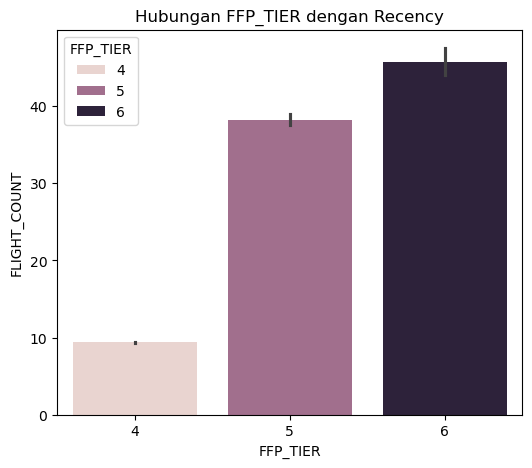

In [67]:

plt.figure(figsize=(6,5))
sns.barplot(data=df_1, x="FFP_TIER", y="FLIGHT_COUNT", hue='FFP_TIER')
plt.title("Hubungan FFP_TIER dengan Recency")
plt.show()

### 3. Apakah setiap tahun mengalami penigkatan jumlah penerbangan ?

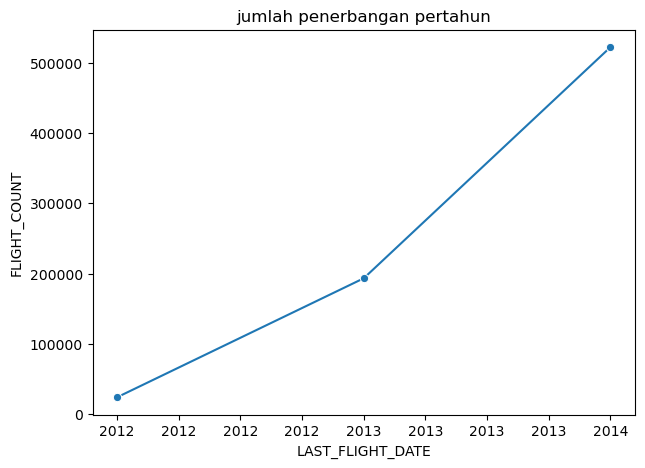

In [68]:

freq_trend = df_1.groupby(df_1["LAST_FLIGHT_DATE"].dt.year)["FLIGHT_COUNT"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=freq_trend, x="LAST_FLIGHT_DATE", y="FLIGHT_COUNT", marker="o")
plt.title("jumlah penerbangan pertahun")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()

### 4. Berapa jumlah penerbangan jika dilihat dari Tiernya ? 

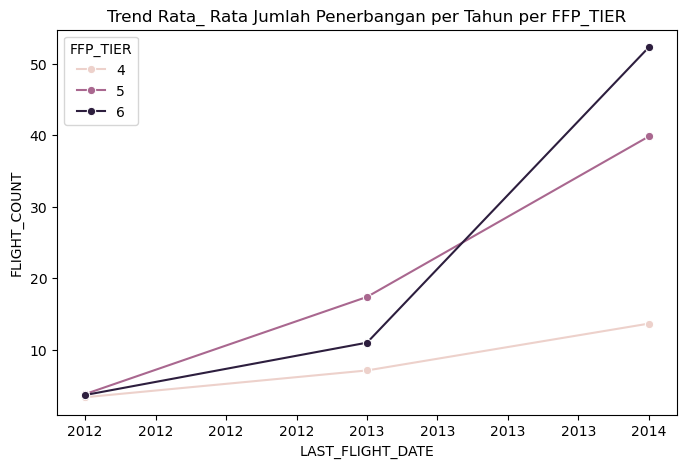

,LAST_FLIGHT_DATE,FFP_TIER,FLIGHT_COUNT
0,2012.0,4,3.356203
1,2012.0,5,3.800000
2,2012.0,6,3.666667
3,2013.0,4,7.100379
4,2013.0,5,17.380282
5,2013.0,6,10.985849
6,2014.0,4,13.649837
7,2014.0,5,39.819803
8,2014.0,6,52.290196


In [69]:
flights_tier_year = df_1.groupby([(df_1["LAST_FLIGHT_DATE"].dt.year),"FFP_TIER"])["FLIGHT_COUNT"].mean().reset_index()

plt.figure(figsize=(8,5))
sns.lineplot(data=flights_tier_year, x="LAST_FLIGHT_DATE", y="FLIGHT_COUNT", hue="FFP_TIER", marker="o")
plt.title("Trend Rata_ Rata Jumlah Penerbangan per Tahun per FFP_TIER")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()
flights_tier_year

### 4.Berapa nilai rata - rata  pedapatan pada setiap Tiernya? 

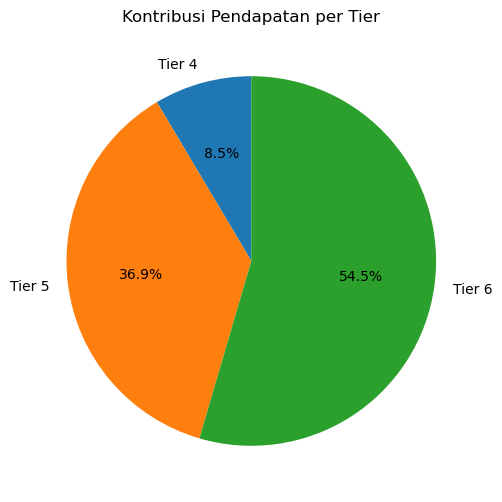

In [70]:
revenue_by_tier = df_1.groupby("FFP_TIER")["total_revenue"].mean().reset_index()

# Visualisasi pie chart semua tier
plt.figure(figsize=(6,6))
plt.pie(revenue_by_tier["total_revenue"],
        labels=[f"Tier {tier}" for tier in revenue_by_tier["FFP_TIER"]],
        autopct='%1.1f%%',
        startangle=90)
plt.title("Kontribusi Pendapatan per Tier")
plt.show()

## 5,Bagaiaman pendapatan pertahunnya apakah mengalami kenaikan ?

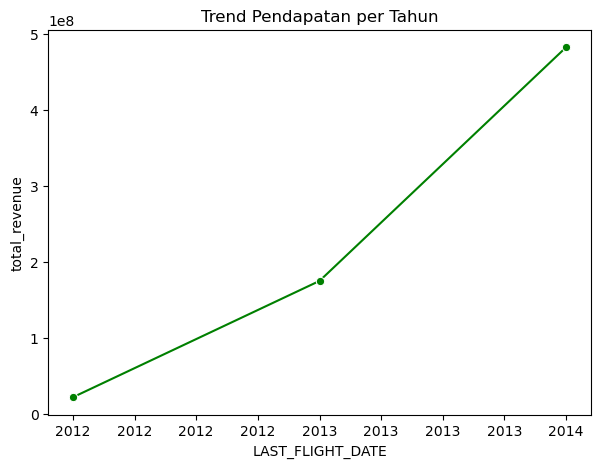

In [71]:
revenue_by_year = df_1.groupby((df_1["LAST_FLIGHT_DATE"].dt.year))["total_revenue"].sum().reset_index()

plt.figure(figsize=(7,5))
sns.lineplot(data=revenue_by_year, x="LAST_FLIGHT_DATE", y="total_revenue", marker="o", color="green")
plt.title("Trend Pendapatan per Tahun")
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f"{int(x)}"))
plt.show()

### 6. Tier/peringkat apa yang paling banyak diperoleh oleh customer ?

FFP_TIER
4    58066
5     3409
6     1513
Name: count, dtype: int64

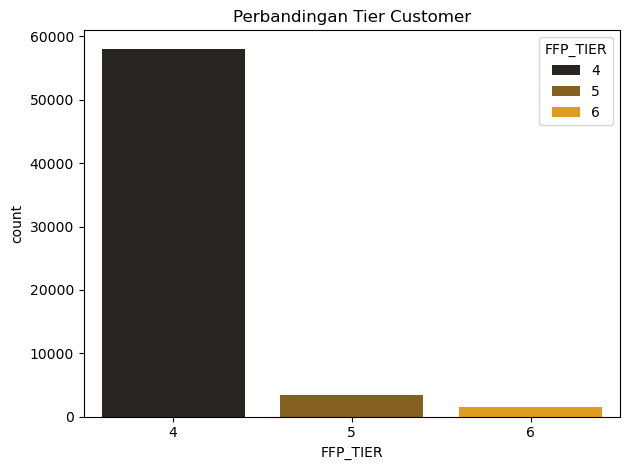

In [72]:
sns.countplot(data=df_1, x='FFP_TIER', hue='FFP_TIER', palette='dark:orange')
plt.title('Perbandingan Tier Customer')
plt.tight_layout()
df['FFP_TIER'].value_counts()

### Deskriftif statistic

In [73]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
MEMBER_NO,62988.0,31494.500000,18183.213715,1.0,15747.750000,31494.500000,47241.250000,62988.0
FFP_TIER,62988.0,4.102162,0.373856,4.0,4.000000,4.000000,4.000000,6.0
AGE,62568.0,42.476346,9.885915,6.0,35.000000,41.000000,48.000000,110.0
FLIGHT_COUNT,62988.0,11.839414,14.049471,2.0,3.000000,7.000000,15.000000,213.0
BP_SUM,62988.0,10925.081254,16339.486151,0.0,2518.000000,5700.000000,12831.000000,505308.0
SUM_YR_1,62437.0,5355.376064,8109.450147,0.0,1003.000000,2800.000000,6574.000000,239560.0
SUM_YR_2,62850.0,5604.026014,8703.364247,0.0,780.000000,2773.000000,6845.750000,234188.0
SEG_KM_SUM,62988.0,17123.878691,20960.844623,368.0,4747.000000,9994.000000,21271.250000,580717.0
LAST_TO_END,62988.0,176.120102,183.822223,1.0,29.000000,108.000000,268.000000,731.0
AVG_INTERVAL,62988.0,67.749788,77.517866,0.0,23.370370,44.666667,82.000000,728.0


In [74]:
df.describe(include='object').T

,count,unique,top,freq
FFP_DATE,62988,3068,1/13/2011,184
FIRST_FLIGHT_DATE,62988,3406,2/16/2013,96
GENDER,62985,2,Male,48134
WORK_CITY,60719,3234,guangzhou,9386
WORK_PROVINCE,59740,1165,guangdong,17509
WORK_COUNTRY,62962,118,CN,57748
LOAD_TIME,62988,1,3/31/2014,62988
LAST_FLIGHT_DATE,62988,731,3/31/2014,959


In [75]:
null_info = (
    df.isnull().sum()
    .to_frame(name='Jumlah Null')
    .assign(Persentase_Null=lambda x: (x['Jumlah Null'] / len(df)) * 100)
    .sort_values(by='Persentase_Null', ascending=False)
)

print(null_info)

                   Jumlah Null  Persentase_Null
WORK_PROVINCE             3248         5.156538
WORK_CITY                 2269         3.602273
SUM_YR_1                   551         0.874770
AGE                        420         0.666794
SUM_YR_2                   138         0.219089
WORK_COUNTRY                26         0.041278
GENDER                       3         0.004763
FFP_TIER                     0         0.000000
MEMBER_NO                    0         0.000000
FFP_DATE                     0         0.000000
FIRST_FLIGHT_DATE            0         0.000000
FLIGHT_COUNT                 0         0.000000
LOAD_TIME                    0         0.000000
BP_SUM                       0         0.000000
SEG_KM_SUM                   0         0.000000
LAST_FLIGHT_DATE             0         0.000000
LAST_TO_END                  0         0.000000
AVG_INTERVAL                 0         0.000000
MAX_INTERVAL                 0         0.000000
EXCHANGE_COUNT               0         0

### Univaiate analisis 


In [76]:
num_col= df.select_dtypes(include=['int64','float64']).columns
obj_col = df.select_dtypes(include=['object']).columns

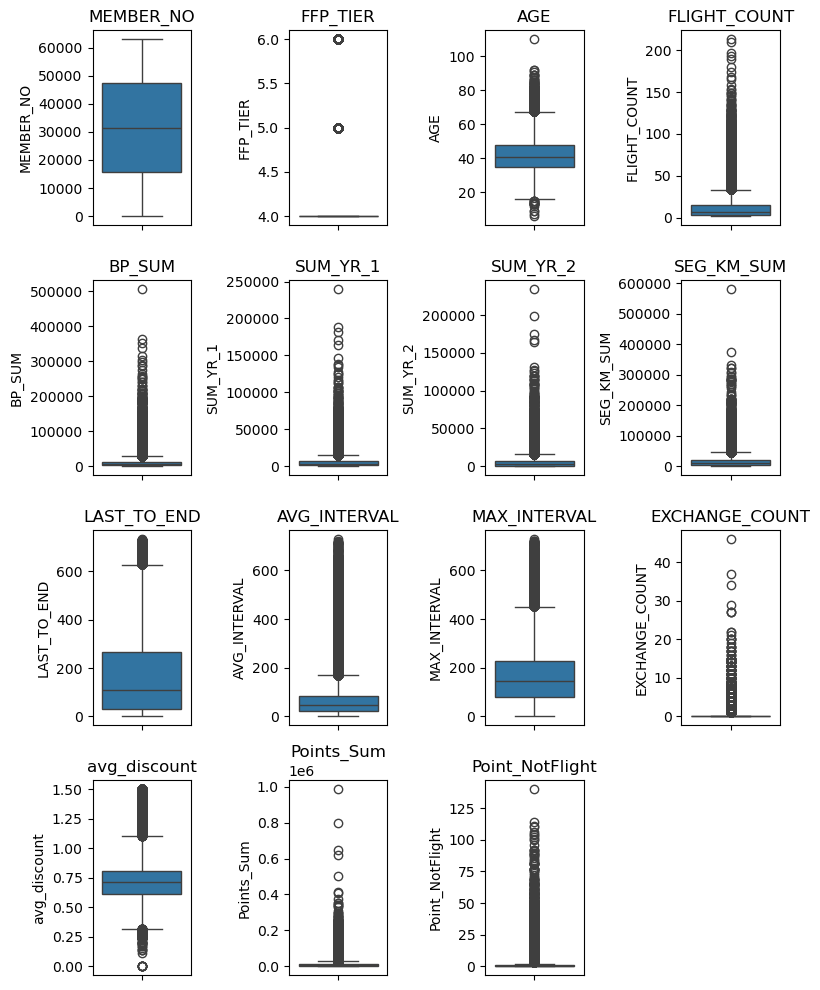

In [77]:
fig, axes = plt.subplots(nrows=int(np.ceil(len(num_col)/4)), ncols=4, figsize=(8, 10))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.boxplot(y=df[col], ax=axes[i])
    axes[i].set_title(col)

# Hide any unused subplots
for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

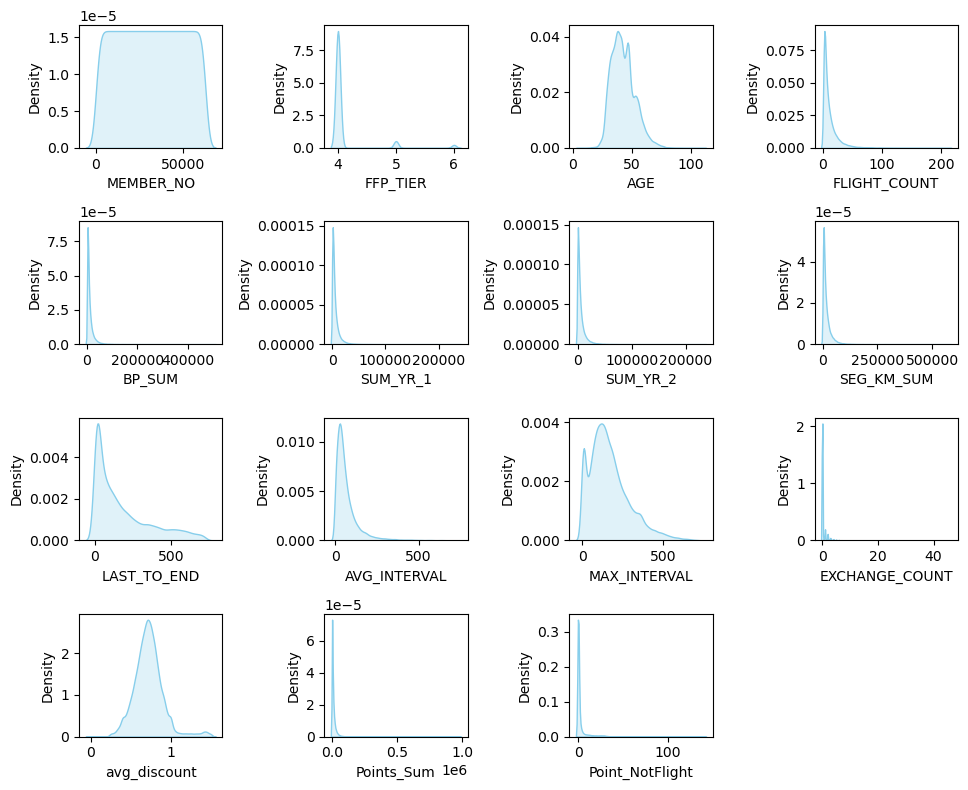

In [78]:
fig, axes = plt.subplots( nrows=int(np.ceil(len(num_col)/4)),ncols=4, figsize=(10, 8))
axes = axes.flatten()

for i, col in enumerate(num_col):
    sns.kdeplot(df[col], ax=axes[i], fill=True, color='skyblue')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Density')

for j in range(len(num_col), len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

rata rata data kolom memiliki outlier

###  Multivariate Analysis

<Axes: >

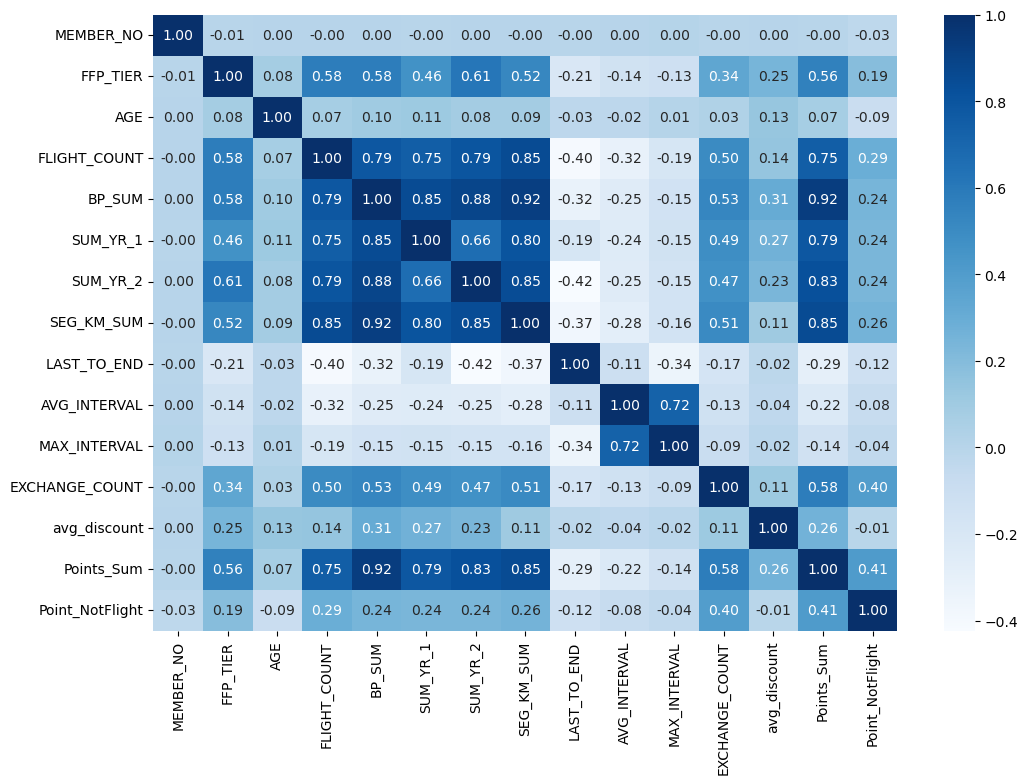

In [79]:
plt.figure(figsize=(12,8))
sns.heatmap(df[num_col].corr(), cmap='Blues',annot=True, fmt='.2f')

terdapat data yang redundan yakni <b>FLIGHT_COUNT,BP_SUM, SUM_YR_1,SUM_YR_2,SEG_KM_SUM , dan Points_Sum</b>

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

## Preprocessing 

### Handling missing value

In [81]:
null_info = (
    df.isnull().sum()
    .to_frame(name='Jumlah Null')
    .assign(Persentase_Null=lambda x: (x['Jumlah Null'] / len(df)) * 100)
    .sort_values(by='Persentase_Null', ascending=False)
)

print(null_info)

                   Jumlah Null  Persentase_Null
WORK_PROVINCE             3248         5.156538
WORK_CITY                 2269         3.602273
SUM_YR_1                   551         0.874770
AGE                        420         0.666794
SUM_YR_2                   138         0.219089
WORK_COUNTRY                26         0.041278
GENDER                       3         0.004763
FFP_TIER                     0         0.000000
MEMBER_NO                    0         0.000000
FFP_DATE                     0         0.000000
FIRST_FLIGHT_DATE            0         0.000000
FLIGHT_COUNT                 0         0.000000
LOAD_TIME                    0         0.000000
BP_SUM                       0         0.000000
SEG_KM_SUM                   0         0.000000
LAST_FLIGHT_DATE             0         0.000000
LAST_TO_END                  0         0.000000
AVG_INTERVAL                 0         0.000000
MAX_INTERVAL                 0         0.000000
EXCHANGE_COUNT               0         0

ada 6 kolom yang memiliki nilai null, karena presentase null masih sekitar 5% dari data makan akan dihapus  

In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62988 entries, 0 to 62987
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          62988 non-null  int64  
 1   FFP_DATE           62988 non-null  object 
 2   FIRST_FLIGHT_DATE  62988 non-null  object 
 3   GENDER             62985 non-null  object 
 4   FFP_TIER           62988 non-null  int64  
 5   WORK_CITY          60719 non-null  object 
 6   WORK_PROVINCE      59740 non-null  object 
 7   WORK_COUNTRY       62962 non-null  object 
 8   AGE                62568 non-null  float64
 9   LOAD_TIME          62988 non-null  object 
 10  FLIGHT_COUNT       62988 non-null  int64  
 11  BP_SUM             62988 non-null  int64  
 12  SUM_YR_1           62437 non-null  float64
 13  SUM_YR_2           62850 non-null  float64
 14  SEG_KM_SUM         62988 non-null  int64  
 15  LAST_FLIGHT_DATE   62988 non-null  object 
 16  LAST_TO_END        629

In [83]:
df_cleaned = df.copy()

In [84]:
df_cleaned = df_cleaned.dropna()

In [85]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   MEMBER_NO          58255 non-null  int64  
 1   FFP_DATE           58255 non-null  object 
 2   FIRST_FLIGHT_DATE  58255 non-null  object 
 3   GENDER             58255 non-null  object 
 4   FFP_TIER           58255 non-null  int64  
 5   WORK_CITY          58255 non-null  object 
 6   WORK_PROVINCE      58255 non-null  object 
 7   WORK_COUNTRY       58255 non-null  object 
 8   AGE                58255 non-null  float64
 9   LOAD_TIME          58255 non-null  object 
 10  FLIGHT_COUNT       58255 non-null  int64  
 11  BP_SUM             58255 non-null  int64  
 12  SUM_YR_1           58255 non-null  float64
 13  SUM_YR_2           58255 non-null  float64
 14  SEG_KM_SUM         58255 non-null  int64  
 15  LAST_FLIGHT_DATE   58255 non-null  object 
 16  LAST_TO_END        58255 no

### Handling duplicate data

In [86]:
df_cleaned.duplicated().sum()

np.int64(0)

Tidak ada kolom duplicate

### Data Adjusment

sebelumnya telah dilakukan penyesuaian type data, tetapi jadi nilai yang null makan akan dilakukan dulu penyebabnya, dan dilakuakn penyesuaian data

In [87]:
mask_invalid = pd.to_datetime(df["LAST_FLIGHT_DATE"], errors="coerce").isna()
invalid_original = df.loc[mask_invalid, "LAST_FLIGHT_DATE"].unique()
print(invalid_original)


['2014/2/29  0:00:00']


In [88]:
print(df_cleaned.loc[df_cleaned["LAST_FLIGHT_DATE"].isna(), "LAST_FLIGHT_DATE"].unique())

[]


In [89]:
df_cleaned.loc[df_cleaned["LAST_FLIGHT_DATE"] == "2014/2/29  0:00:00", "LAST_FLIGHT_DATE"] = "2014-02-28"

In [90]:
df_cleaned["FIRST_FLIGHT_DATE"] = pd.to_datetime(df_cleaned["FIRST_FLIGHT_DATE"], errors="coerce")
df_cleaned["LAST_FLIGHT_DATE"] = pd.to_datetime(df_cleaned["LAST_FLIGHT_DATE"], errors="coerce")
df_cleaned["LOAD_TIME"] = pd.to_datetime(df_cleaned["LOAD_TIME"], errors="coerce")

Mengubah data yang sebelumnya bertype object menjadi datetime

In [91]:
df_cleaned.isna().sum()

MEMBER_NO              0
FFP_DATE               0
FIRST_FLIGHT_DATE      0
GENDER                 0
FFP_TIER               0
WORK_CITY              0
WORK_PROVINCE          0
WORK_COUNTRY           0
AGE                    0
LOAD_TIME              0
FLIGHT_COUNT           0
BP_SUM                 0
SUM_YR_1               0
SUM_YR_2               0
SEG_KM_SUM             0
LAST_FLIGHT_DATE     395
LAST_TO_END            0
AVG_INTERVAL           0
MAX_INTERVAL           0
EXCHANGE_COUNT         0
avg_discount           0
Points_Sum             0
Point_NotFlight        0
dtype: int64

## Feature encoding

In [92]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 58255 entries, 0 to 62986
Data columns (total 23 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   MEMBER_NO          58255 non-null  int64         
 1   FFP_DATE           58255 non-null  object        
 2   FIRST_FLIGHT_DATE  58255 non-null  datetime64[ns]
 3   GENDER             58255 non-null  object        
 4   FFP_TIER           58255 non-null  int64         
 5   WORK_CITY          58255 non-null  object        
 6   WORK_PROVINCE      58255 non-null  object        
 7   WORK_COUNTRY       58255 non-null  object        
 8   AGE                58255 non-null  float64       
 9   LOAD_TIME          58255 non-null  datetime64[ns]
 10  FLIGHT_COUNT       58255 non-null  int64         
 11  BP_SUM             58255 non-null  int64         
 12  SUM_YR_1           58255 non-null  float64       
 13  SUM_YR_2           58255 non-null  float64       
 14  SEG_KM_SUM 

## Feature extraction 

In [93]:
df_cleaned["total_revenue"] = df_cleaned[["SUM_YR_1", "SUM_YR_2"]].sum(axis=1, skipna=True)
df_cleaned["Membership_Years"] = ((df_cleaned["LOAD_TIME"] - df_cleaned["FIRST_FLIGHT_DATE"]).dt.days / 365).clip(lower=1)

Membuat feature baru <br>
- total_revenue : untuk menghitung total pembayaran kustomer 
- Membership_Years : untuk menghitung berapa tahun pelanggan telah menggunakan maskapai ini

In [94]:
df_cleaned.describe()

,MEMBER_NO,FIRST_FLIGHT_DATE,FFP_TIER,AGE,LOAD_TIME,FLIGHT_COUNT,BP_SUM,SUM_YR_1,SUM_YR_2,SEG_KM_SUM,LAST_FLIGHT_DATE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,total_revenue,Membership_Years
count,58255.000000,58255,58255.000000,58255.000000,58255,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,57860,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000,58255.000000
mean,31545.754854,2010-09-23 19:34:01.472834816,4.104849,42.228736,2014-03-31 00:00:00,12.067634,11066.303682,5366.827963,5694.530650,17353.000910,2013-10-11 12:36:09.706187520,171.255309,67.937285,167.349206,0.328384,0.720627,12742.648820,2.820548,11061.358613,3.543157
min,3.000000,1905-12-31 00:00:00,4.000000,6.000000,2014-03-31 00:00:00,2.000000,0.000000,0.000000,0.000000,368.000000,2012-04-01 00:00:00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,15787.500000,2009-01-22 00:00:00,4.000000,35.000000,2014-03-31 00:00:00,3.000000,2608.000000,1016.000000,846.000000,4904.000000,2013-07-16 18:00:00,28.000000,23.700000,81.000000,0.000000,0.612155,2872.500000,0.000000,2776.000000,1.654795
50%,31603.000000,2011-05-24 00:00:00,4.000000,41.000000,2014-03-31 00:00:00,7.000000,5832.000000,2808.000000,2846.000000,10237.000000,2013-12-18 00:00:00,104.000000,44.833333,144.000000,0.000000,0.711468,6487.000000,0.000000,5979.000000,2.854795
75%,47315.500000,2012-08-04 00:00:00,4.000000,48.000000,2014-03-31 00:00:00,15.000000,13022.000000,6591.500000,6958.000000,21571.500000,2014-03-04 00:00:00,258.000000,82.000000,228.000000,0.000000,0.808159,14527.000000,1.000000,13123.500000,5.189041
max,62988.000000,2015-04-03 00:00:00,6.000000,110.000000,2014-03-31 00:00:00,213.000000,505308.000000,239560.000000,234188.000000,580717.000000,2014-03-31 00:00:00,731.000000,728.000000,728.000000,46.000000,1.500000,985572.000000,140.000000,473748.000000,108.320548
std,18187.496028,NaN,0.378182,9.761965,NaN,14.236472,16283.209178,8103.595049,8710.724917,20969.886756,NaN,180.560120,77.449058,122.890446,1.148485,0.183895,20606.104272,7.500252,15340.129537,2.318276


## Feature_Selection

In [95]:
num_col= df_cleaned.select_dtypes(include=['int64','float64']).columns

<Axes: >

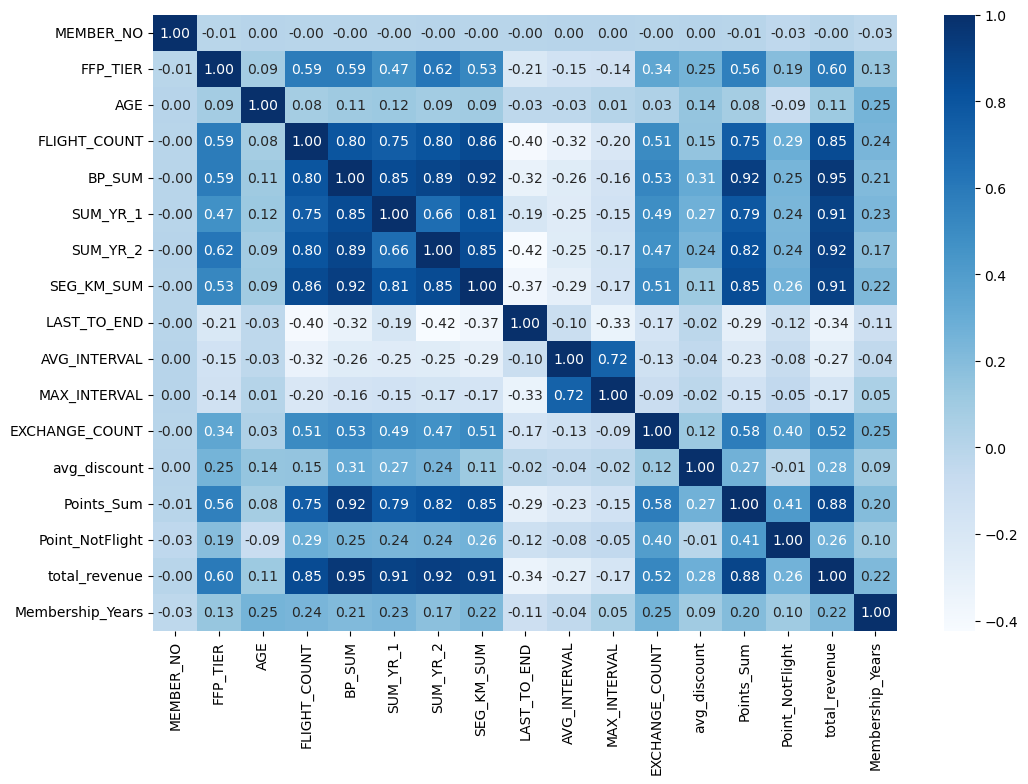

In [96]:
plt.figure(figsize=(12,8))
sns.heatmap(df_cleaned[num_col].corr(), cmap='Blues',annot=True, fmt='.2f')

In [100]:
feats = ['FFP_TIER', 'FLIGHT_COUNT','AGE','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','avg_discount','total_revenue','Membership_Years']


Memilih 9 Feature  : <br>
1. FFP_TIER – Menggambarkan level membership customer, mencerminkan loyalitas dan nilai customer bagi maskapai.

2. FLIGHT_COUNT – Menunjukkan frekuensi penerbangan, indikator untuk perilaku perjalanan customer.

3. AGE – Usia memengaruhi preferensi dan pola perjalanan customer.

4. LAST_TO_END – Selisih hari dari penerbangan terakhir ke tanggal data terakhir diambil, menunjukkan kapan terkahir customer melakukan perjalanan.

5. AVG_INTERVAL – Rata-rata selang waktu antar penerbangan, mengukur konsistensi perjalanan.

6. MAX_INTERVAL – Selang waktu terpanjang antar penerbangan, membantu mendeteksi pola penerbangan customer.

7. avg_discount – Menunjukkan sensitivitas pelanggan terhadap harga dan promosi.

8. total_revenue – Total pendapatan yang dihasilkan pelanggan, analisis nilai pelanggan.

9. Membership_years – Lama menjadi anggota, mencerminkan loyalitas jangka panjang dan potensi retensi.

## Standardization 

In [104]:
from sklearn.preprocessing import StandardScaler
feats = ['FFP_TIER', 'FLIGHT_COUNT','AGE','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','avg_discount','total_revenue','Membership_Years']

X = df_cleaned[feats].copy() 

# Buat objek scaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Untuk hasilnya kembali jadi DataFrame
X_scaled_df = pd.DataFrame(X_scaled, columns=X.columns)
X_scaled_df.describe().T

,count,mean,std,min,25%,50%,75%,max
FFP_TIER,58255.0,-7.059688e-16,1.000009,-0.277248,-0.277248,-0.277248,-0.277248,5.011257
FLIGHT_COUNT,58255.0,4.293383e-17,1.000009,-0.707178,-0.636935,-0.355964,0.205977,14.114037
AGE,58255.0,-3.439585e-16,1.000009,-3.711245,-0.740506,-0.125871,0.591204,6.942439
LAST_TO_END,58255.0,3.512768e-17,1.000009,-0.942937,-0.793401,-0.372485,0.480424,3.100073
AVG_INTERVAL,58255.0,-3.317614e-17,1.000009,-0.877194,-0.571184,-0.298314,0.181575,8.522613
MAX_INTERVAL,58255.0,5.464306e-17,1.000009,-1.361787,-0.702658,-0.190002,0.493540,4.562239
avg_discount,58255.0,-1.951538e-17,1.000009,-3.918720,-0.589860,-0.049801,0.475995,4.238182
total_revenue,58255.0,3.903076e-18,1.000009,-0.721080,-0.540115,-0.331314,0.134429,30.162106
Membership_Years,58255.0,1.444138e-16,1.000009,-1.097013,-0.814562,-0.296931,0.709966,45.196646


## Modeling

Modeling menggunakan K-Means

In [115]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
kmeans_no_pca = KMeans(n_clusters=4, random_state=42)
labels_no_pca = kmeans_no_pca.fit_predict(X_scaled)
df_kmeans_no_pca = pd.DataFrame(X_scaled, columns=feats)
df_kmeans_no_pca['Cluster'] = labels_no_pca
df_kmeans_no_pca.head()

,FFP_TIER,FLIGHT_COUNT,AGE,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,avg_discount,total_revenue,Membership_Years,Cluster
0,5.011257,13.903309,-1.150263,-0.942937,-0.832219,-1.215314,1.310610,30.162106,0.744239,2
1,5.011257,8.635104,-0.228310,-0.887553,-0.808781,-1.215314,2.904123,20.700045,1.313869,2
2,2.367004,0.767919,2.230232,-0.411253,-0.517424,-0.767757,2.013357,15.044894,0.889601,2
3,5.011257,9.829231,0.591204,-0.920783,-0.815371,-0.979329,1.359654,15.919210,0.611877,2
4,5.011257,5.614667,2.230232,-0.510944,-0.786244,-0.938643,1.343528,11.619861,0.414515,2


In [118]:
#Analisis cluster
print("Jumlah anggota tiap cluster:")
df_kmeans_no_pca['Cluster'].value_counts()

Jumlah anggota tiap cluster:


Cluster
0    29914
3    14060
1     9928
2     4353
Name: count, dtype: int64

Untuk melihat cluster yang telah dibuat datanya kita reduksi dulu dimensinya dengan PCA agar mudah untuk melihat pembagian clusternya

In [124]:
from sklearn.decomposition import PCA

# --- PCA untuk visualisasi ---
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca_plot = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_plot['Cluster'] = labels_no_pca 
df_pca_plot.head()

,PC1,PC2,Cluster
0,26.343316,3.256928,2
1,19.109484,2.371909,2
2,10.594449,1.457847,2
3,16.829035,2.057561,2
4,12.390445,1.375941,2


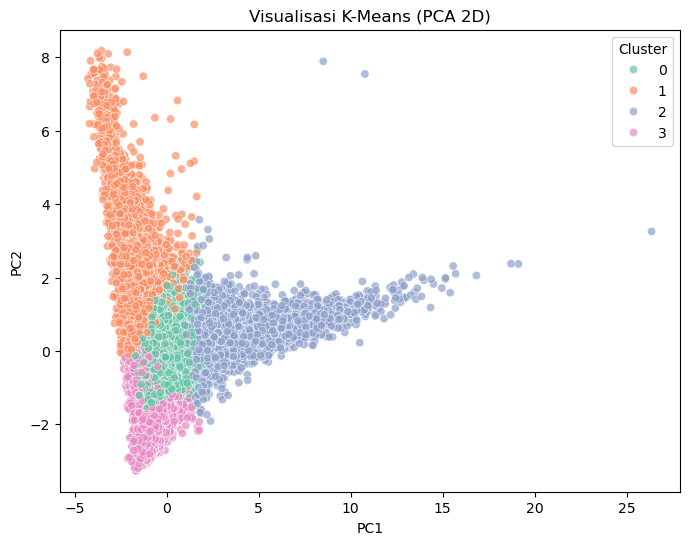

In [129]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca_plot,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    alpha=0.7
)
plt.title('Visualisasi K-Means (PCA 2D)')
plt.show()

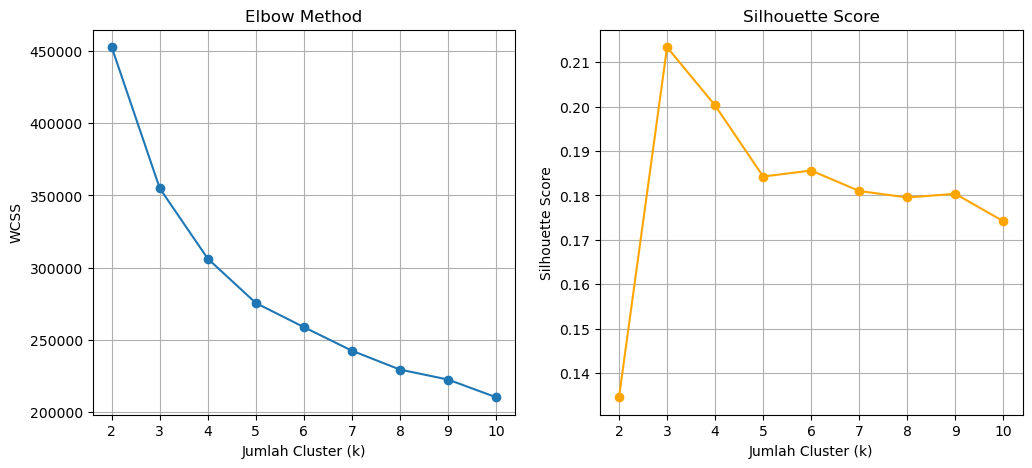

In [133]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

# Range jumlah cluster yang akan diuji
range_n_clusters = range(2, 11)

# Untuk menyimpan hasil
wcss = []  # inertia_
silhouette_avg = []

for n_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(X_scaled)
    
    # Simpan WCSS
    wcss.append(kmeans.inertia_)
    
    # Hitung silhouette score
    silhouette_avg.append(silhouette_score(X_scaled, cluster_labels))

# Plot Elbow Method
plt.figure(figsize=(12,5))

plt.subplot(1, 2, 1)
plt.plot(range_n_clusters, wcss, marker='o')
plt.title('Elbow Method')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('WCSS')
plt.grid(True)

# Plot Silhouette Score
plt.subplot(1, 2, 2)
plt.plot(range_n_clusters, silhouette_avg, marker='o', color='orange')
plt.title('Silhouette Score')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Silhouette Score')
plt.grid(True)

plt.show()


In [136]:
df_evaluasi = pd.DataFrame({
    'k': list(range_n_clusters),
    'WCSS': wcss,
    'Silhouette Score': silhouette_avg
})

df_evaluasi

,k,WCSS,Silhouette Score
0,2,452784.558838,0.134537
1,3,354909.086347,0.213397
2,4,306129.397170,0.200293
3,5,275401.790985,0.184266
4,6,258685.605658,0.185612
5,7,242346.604326,0.181002
6,8,229248.883872,0.179547
7,9,222342.740096,0.180366
8,10,210087.448209,0.174194


Dari elbow method menunjukan cluseter optimal antara 3 dan 4 cluster dan dari shilhouette score adalah 3 cluster. 

K-Means Dengan 3 cluster

In [138]:
kmeans_3c = KMeans(n_clusters=3, random_state=42)
labels_3c = kmeans_3c.fit_predict(X_scaled)
df_kmeans_3c = pd.DataFrame(X_scaled, columns=feats)
df_kmeans_3c['Cluster'] = labels_3c
print("Jumlah anggota 3 cluster:")
df_kmeans_3c['Cluster'].value_counts()

Jumlah anggota 3 cluster:


Cluster
0    41262
1    12217
2     4776
Name: count, dtype: int64

In [139]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca_plot_3c = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
df_pca_plot_3c['Cluster'] = labels_3c
df_pca_plot_3c.head()

,PC1,PC2,Cluster
0,26.343316,3.256928,2
1,19.109484,2.371909,2
2,10.594449,1.457847,2
3,16.829035,2.057561,2
4,12.390445,1.375941,2


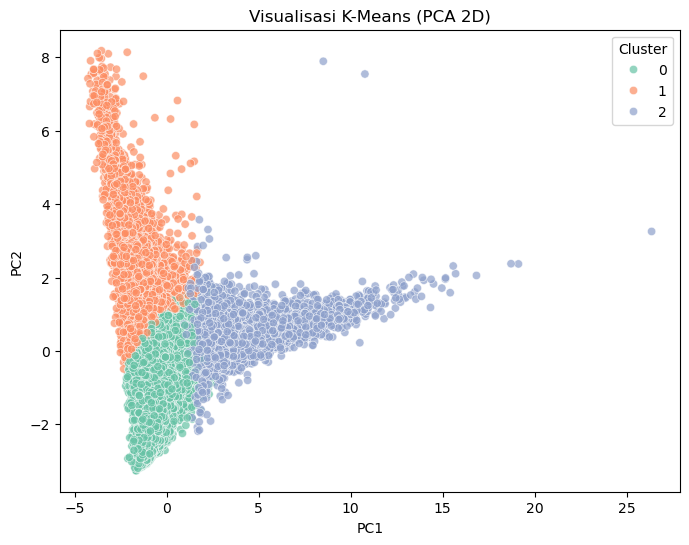

In [140]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    data=df_pca_plot_3c,
    x='PC1', y='PC2',
    hue='Cluster',
    palette='Set2',
    alpha=0.7
)
plt.title('Visualisasi K-Means (PCA 2D)')
plt.show()

In [141]:
df_cleaned['Cluster'] = labels_3c

In [142]:
df_cleaned.head()

,MEMBER_NO,FFP_DATE,FIRST_FLIGHT_DATE,GENDER,FFP_TIER,WORK_CITY,WORK_PROVINCE,WORK_COUNTRY,AGE,LOAD_TIME,...,LAST_TO_END,AVG_INTERVAL,MAX_INTERVAL,EXCHANGE_COUNT,avg_discount,Points_Sum,Point_NotFlight,total_revenue,Membership_Years,Cluster
0,54993,11/2/2006,2008-12-24,Male,6,.,beijing,CN,31.0,2014-03-31,...,1,3.483254,18,34,0.961639,619760,50,473748.0,5.268493,2
2,55106,2/1/2007,2007-08-30,Male,6,.,beijing,CN,40.0,2014-03-31,...,11,5.298507,18,20,1.254676,406361,26,328600.0,6.589041,2
3,21189,8/22/2008,2008-08-23,Male,5,Los Angeles,CA,US,64.0,2014-03-31,...,97,27.863636,73,11,1.090870,372204,12,241850.0,5.605479,2
4,39546,4/10/2009,2009-04-15,Male,6,guiyang,guizhou,CN,48.0,2014-03-31,...,5,4.788079,47,27,0.970658,338813,39,255262.0,4.961644,2
5,56972,2/10/2008,2009-09-29,Male,6,guangzhou,guangdong,CN,64.0,2014-03-31,...,79,7.043956,52,10,0.967692,343121,15,189310.0,4.504110,2


In [145]:
df_cleaned['Cluster'].value_counts()

Cluster
0    41262
1    12217
2     4776
Name: count, dtype: int64

In [146]:
df_cleaned['Cluster'].describe().T

count    58255.000000
mean         0.373685
std          0.630888
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          2.000000
Name: Cluster, dtype: float64

In [153]:
feats = ['FFP_TIER', 'FLIGHT_COUNT','AGE','LAST_TO_END','AVG_INTERVAL','MAX_INTERVAL','avg_discount','total_revenue','Membership_Years','Cluster']
display(df_cleaned[feats].groupby('Cluster').agg(['mean','median']))

FFP_TIER        FLIGHT_COUNT               AGE        LAST_TO_END  \
             mean median         mean median       mean median        mean   
Cluster                                                                      
0        4.007949    4.0    10.420435    8.0  42.032112   41.0  202.942029   
1        4.011378    4.0     4.952280    4.0  41.774986   40.0  119.011869   
2        5.181114    5.0    44.499581   42.0  45.088149   45.0   31.138191   

               AVG_INTERVAL             MAX_INTERVAL        avg_discount  \
        median         mean      median         mean median         mean   
Cluster                                                                    
0        131.0    42.854328   38.333333   122.109132  123.0     0.710236   
1         93.0   171.383980  138.500000   347.444381  333.0     0.699015   
2         12.0    20.023704   15.752778    97.515285   83.0     0.865679   

                  total_revenue          Membership_Years            
           median          mean   median             mean    median  
Cluster                                                              
0        0.705490   9035.334182   6427.0         3.416763  2.723288  
1        0.693711   4479.012196   3558.0         3.446990  2.753425  
2        0.789838  45402.720896  39605.5         4.881136  4.627397